In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the gene lists for AD, PD, and Dementia
genes_ad = pd.read_csv('/content/Alzheimer_genes.csv')
genes_pd = pd.read_csv('/content/Parkinson_genes.csv')
genes_dementia = pd.read_csv('/content/Dementia_genes.csv')

In [3]:
# View the first few rows of the datasets
print(genes_ad.head())
print(genes_pd.head())
print(genes_dementia.head())

  Gene Symbol                         Description        Category Uniprot ID  \
0         APP      Amyloid Beta Precursor Protein  Protein Coding     P05067   
1        APOE                    Apolipoprotein E  Protein Coding     P02649   
2       PSEN1                        Presenilin 1  Protein Coding     P49768   
3        MAPT  Microtubule Associated Protein Tau  Protein Coding     P10636   
4       PSEN2                        Presenilin 2  Protein Coding     P49810   

   Gifts        GC Id  Relevance score  \
0     63  GC21M025880       112.525345   
1     63  GC19P143132        75.069977   
2     66  GC14P073136        69.700562   
3     63  GC17P045894        55.739155   
4     63  GC01P226870        50.234596   

                                      GeneCards Link  
0  https://www.genecards.org/cgi-bin/carddisp.pl?...  
1  https://www.genecards.org/cgi-bin/carddisp.pl?...  
2  https://www.genecards.org/cgi-bin/carddisp.pl?...  
3  https://www.genecards.org/cgi-bin/carddisp.

In [4]:
# Extract gene symbols for each dataset (assuming 'Gene Symbol' is the column name)
ad_genes = set(genes_ad['Gene Symbol'].dropna())
pd_genes = set(genes_pd['Gene Symbol'].dropna())
dementia_genes = set(genes_dementia['Gene Symbol'].dropna())

In [5]:
# Find the intersection of genes across all three diseases
intersection_all = ad_genes.intersection(pd_genes).intersection(dementia_genes)

# Intersection between two diseases
intersection_ad_pd = ad_genes.intersection(pd_genes)
intersection_ad_dementia = ad_genes.intersection(dementia_genes)
intersection_pd_dementia = pd_genes.intersection(dementia_genes)

# Genes unique to each disease (Optional for visualization)
unique_ad = ad_genes - (pd_genes.union(dementia_genes))
unique_pd = pd_genes - (ad_genes.union(dementia_genes))
unique_dementia = dementia_genes - (ad_genes.union(pd_genes))

# Print the intersections
print(f"Genes in all three diseases: {len(intersection_all)}")
print(f"Genes in AD & PD: {len(intersection_ad_pd)}")
print(f"Genes in AD & Dementia: {len(intersection_ad_dementia)}")
print(f"Genes in PD & Dementia: {len(intersection_pd_dementia)}")

Genes in all three diseases: 3274
Genes in AD & PD: 3768
Genes in AD & Dementia: 6102
Genes in PD & Dementia: 4130


The unique gene counts in each disease

In [24]:
# Find unique genes for each disease
unique_ad = ad_genes - (pd_genes | dementia_genes)  # Genes in AD but not in PD or Dementia
unique_pd = pd_genes - (ad_genes | dementia_genes)  # Genes in PD but not in AD or Dementia
unique_dementia = dementia_genes - (ad_genes | pd_genes)  # Genes in Dementia but not in AD or PD

# Count unique genes
unique_counts = {
    "Unique to AD": len(unique_ad),
    "Unique to PD": len(unique_pd),
    "Unique to Dementia": len(unique_dementia)
}

# Print results
print(unique_counts)

{'Unique to AD': 2660, 'Unique to PD': 641, 'Unique to Dementia': 3756}


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!pip install matplotlib_venn

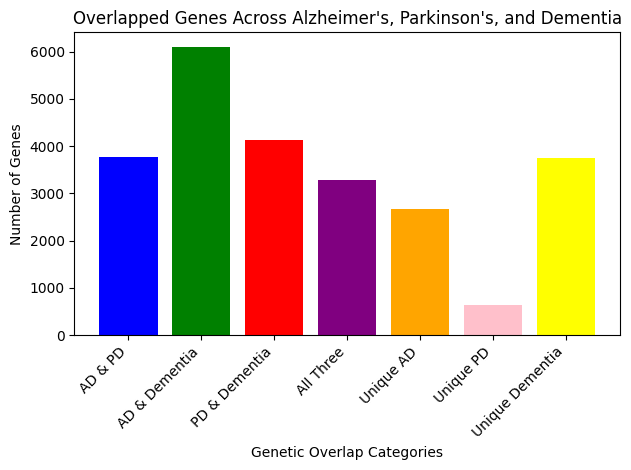

In [23]:
# Create a bar chart for gene overlaps
overlap_counts = {
    'AD & PD': len(intersection_ad_pd),
    'AD & Dementia': len(intersection_ad_dementia),
    'PD & Dementia': len(intersection_pd_dementia),
    'All Three': len(intersection_all),
    'Unique AD': len(unique_ad),
    'Unique PD': len(unique_pd),
    'Unique Dementia': len(unique_dementia)
}

# Plot the bar chart
plt.bar(overlap_counts.keys(), overlap_counts.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'yellow'])
plt.xlabel('Genetic Overlap Categories')
plt.ylabel('Number of Genes')
plt.title('Overlapped Genes Across Alzheimer\'s, Parkinson\'s, and Dementia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


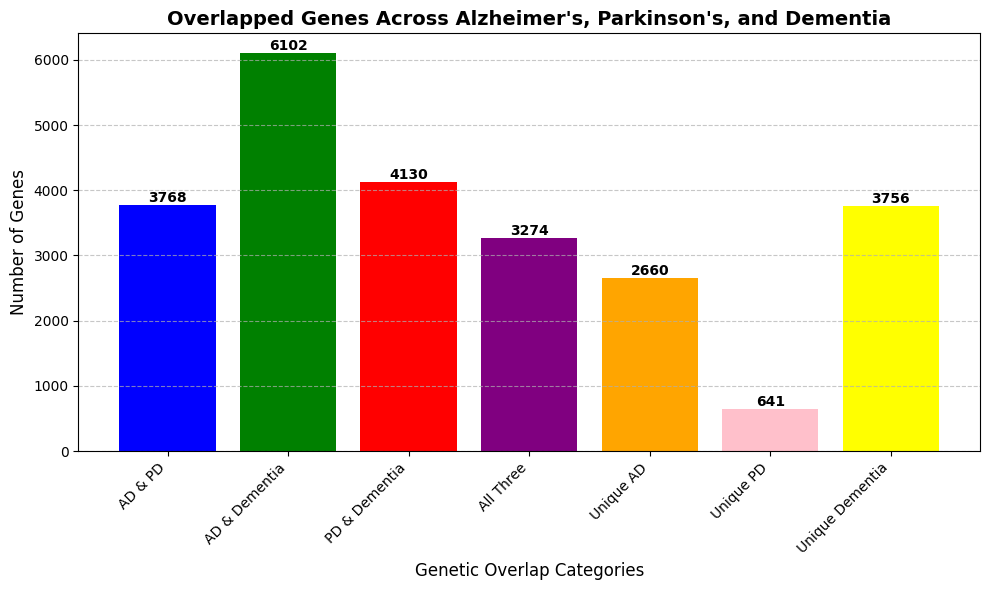

In [25]:
import matplotlib.pyplot as plt

# Sample overlap counts (Replace these with your actual computed values)
overlap_counts = {
    'AD & PD': 3768,
    'AD & Dementia': 6102,
    'PD & Dementia': 4130,
    'All Three': 3274,
    'Unique AD': 2660,
    'Unique PD': 641,
    'Unique Dementia': 3756
}


# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(overlap_counts.keys(), overlap_counts.values(),
               color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'yellow'])

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel('Genetic Overlap Categories', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Overlapped Genes Across Alzheimer\'s, Parkinson\'s, and Dementia', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()

# Show the plot
plt.show()

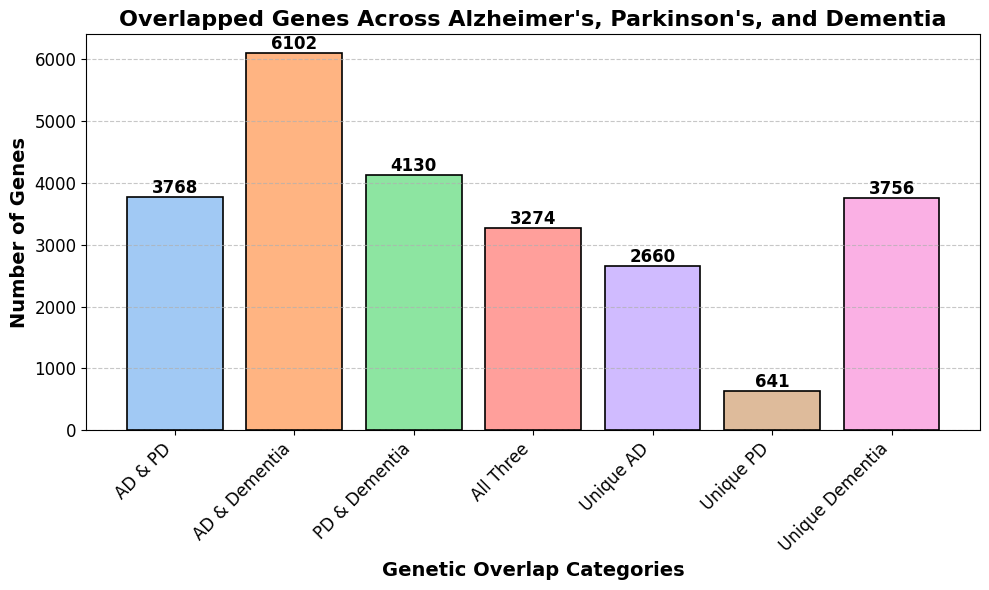

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding the actual values
overlap_counts = {
    'AD & PD': 3768,
    'AD & Dementia': 6102,
    'PD & Dementia': 4130,
    'All Three': 3274,
    'Unique AD': 2660,
    'Unique PD': 641,
    'Unique Dementia': 3756
}

# Define color palette
colors = sns.color_palette("pastel", len(overlap_counts))

# Create figure
plt.figure(figsize=(10, 6))

# Create bars
bars = plt.bar(overlap_counts.keys(), overlap_counts.values(), color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,  # Adjust position
             str(bar.get_height()), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Formatting
plt.xlabel('Genetic Overlap Categories', fontsize=14, fontweight='bold')
plt.ylabel('Number of Genes', fontsize=14, fontweight='bold')
plt.title('Overlapped Genes Across Alzheimer\'s, Parkinson\'s, and Dementia', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a light grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


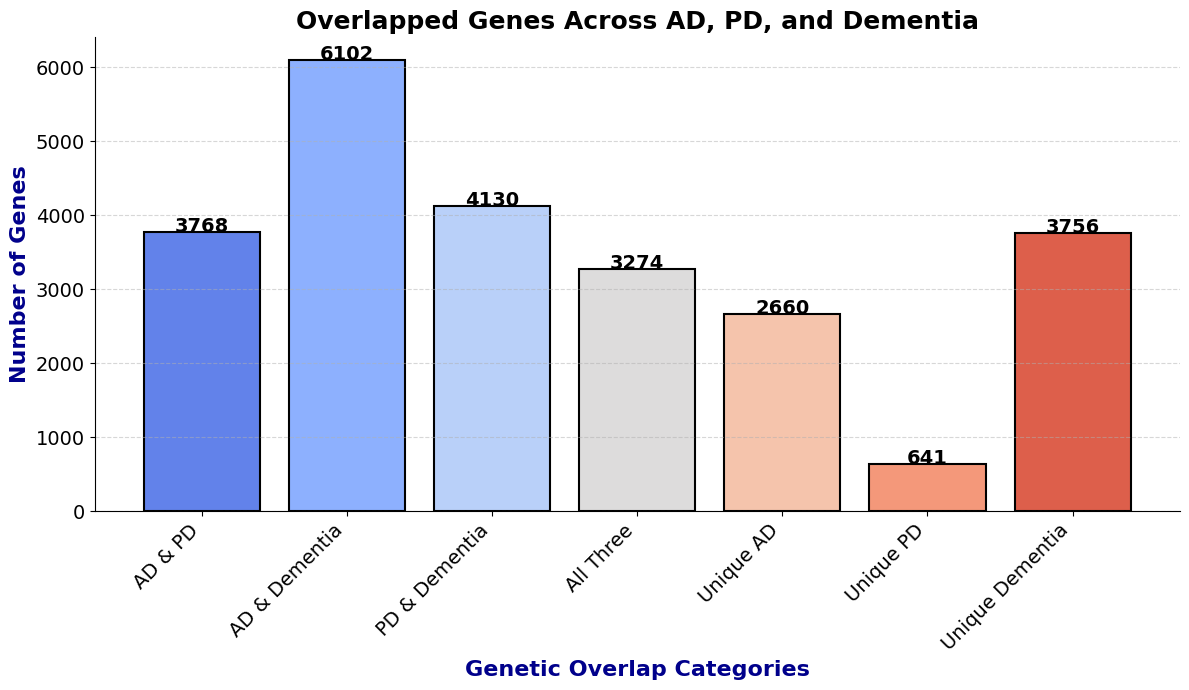

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# adding data values
overlap_counts = {
    'AD & PD': 3768,
    'AD & Dementia': 6102,
    'PD & Dementia': 4130,
    'All Three': 3274,
    'Unique AD': 2660,
    'Unique PD': 641,
    'Unique Dementia': 3756
}


# Custom color palette with gradient effect
colors = sns.color_palette("coolwarm", len(overlap_counts))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create bars with custom colors
bars = ax.bar(overlap_counts.keys(), overlap_counts.values(), color=colors, edgecolor='black', linewidth=1.5)

# Add data labels on bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            str(bar.get_height()), ha='center', fontsize=14, fontweight='bold', color='black')

# Customizing labels & title
ax.set_xlabel('Genetic Overlap Categories', fontsize=16, fontweight='bold', color='darkblue')
ax.set_ylabel('Number of Genes', fontsize=16, fontweight='bold', color='darkblue')
ax.set_title('Overlapped Genes Across AD, PD, and Dementia', fontsize=18, fontweight='bold', color='black')

# Customizing ticks
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add a light dashed grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove top and right border for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save as high-resolution file
plt.savefig("gene_overlap_chart.svg", format="svg", dpi=300)  # For publication-quality images
plt.savefig("gene_overlap_chart.png", dpi=300)  # PNG version

# Show plot
plt.show()


The Total Number of the Genes in all the three Diseases

In [10]:
# Combine all unique genes from the three disease sets using union
all_genes_total = ad_genes.union(pd_genes).union(dementia_genes)

# Get the total number of unique genes
total_genes = len(all_genes_total)

# Print the total number of unique genes
print(f"Total number of unique genes across Alzheimer's, Parkinson's, and Dementia: {total_genes}")


Total number of unique genes across Alzheimer's, Parkinson's, and Dementia: 14509


In [11]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24839 sha256=85a943b77d9a039857a598ecf91145493988703db45538f0b4767c051a5c2159
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


Finding the overlapped genes across the diseases

In [17]:
overlapped_genes = (ad_genes & pd_genes) | (ad_genes & dementia_genes) | (pd_genes & dementia_genes)